In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Homocidios en Colombia desde Marzo 2010 hasta Junio de 2019

In [2]:
datos = pd.read_csv("datosTotal.csv", parse_dates = ["FECHA"] ) #Con formato a las fechas 
# print(datos.head(10))

In [3]:
print(datos.columns)

Index(['FECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'DIA', 'BARRIO', 'ZONA',
       'CLASE SITIO', 'ARMA EMPLEADA', 'MOVIL AGRESOR', 'MOVIL VICTIMA',
       'EDAD', 'SEXO', 'ESTADO CIVIL', 'PAIS NACE', 'CLASE EMPLEADO',
       'PROFESIONES', 'ESCOLARIDAD', 'CODIGO DANE', 'CANTIDAD', 'H', 'M'],
      dtype='object')


## Histogramas

### Edades

El histograma nos muestra que la edad de las personas asesinadas, la mayoria esta entre los 20 y 40 años

32.10038064592081
12.81431365802848


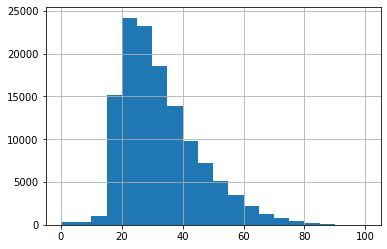

In [4]:
edades=datos[["EDAD"]]
print(edades["EDAD"].mean())
print(edades["EDAD"].std())
edades["EDAD"].hist(bins=20)

## Análisis 

### Día donde suceden más homicidios

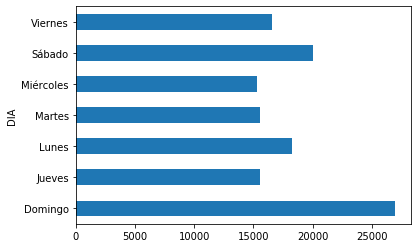

In [5]:
datosXdia = datos[["DIA", "CANTIDAD"]]
# print(datosXdia.shape) # Conocer el numero de datos, por numero de atributos
datosXdia = datosXdia.groupby(["DIA"])["CANTIDAD"].sum() #Agrupar los datos por dia, sumando la cantidad de homicidios
datosXdia.plot.barh()

### Hora al Día donde suceden más homicios

El mapa de calor nos demuestra que la hora donde ocurren más homicidios es el domingo en horas de la madrugada, el domingo en horas de la tarde, los sabados a las 9pm y en general, todos los días de 7pm a 10pm

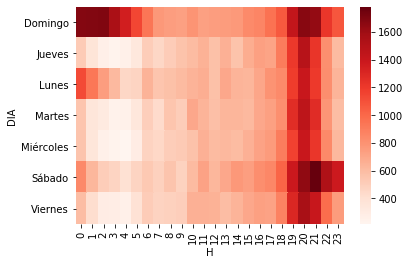

In [6]:
datosXdiaHora = datos[["DIA", "CANTIDAD","H"]]

# Realizar Mapa de Calor
datosXdiaHora = datosXdiaHora.pivot_table(values="CANTIDAD", index=['DIA'], columns=['H'],aggfunc=np.sum)
sns.heatmap(datosXdiaHora, cmap="Reds")

### Homocidios por Género

La gráfica de torta nos demuestra que el mayor numero de victimas son hombres

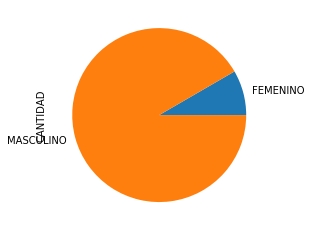

In [7]:
datosXsexo = datos[["SEXO", "CANTIDAD"]]
datosXsexo = datosXsexo.groupby(["SEXO"])["CANTIDAD"].sum()
datosXsexo.plot.pie()

### Arma Empleada

La gráfica de torta nos demuestra que el mayor numero de victimas son hombres

In [8]:
datosXarma = datos[["ARMA EMPLEADA", "CANTIDAD"]]
datosXarma = datosXarma.groupby(["ARMA EMPLEADA"])["CANTIDAD"].sum()
print(datosXarma.head(10))

ARMA EMPLEADA
ACIDO                                     6
ALMOHADA                                 44
ARMA BLANCA                           25264
ARMA DE FUEGO                         96670
ARTEFACTO EXPLOSIVO/CARGA DINAMITA      484
ARTEFACTO INCENDIARIO                    19
BOLSA PLASTICA                          189
CARRO BOMBA                              26
CASA BOMBA                               18
CILINDRO BOMBA                           52
Name: CANTIDAD, dtype: int64


### Series de Tiempo


In [9]:
datos=datos[["FECHA","CANTIDAD"]]
#Datos que sean mayores del 2019 de enero
datos2019=datos[datos["FECHA"]>=pd.Timestamp('20190101').to_pydatetime()]

In [10]:
# Numero de homicidios por fecha
datos2019=datos2019.groupby(["FECHA"])["CANTIDAD"].sum()

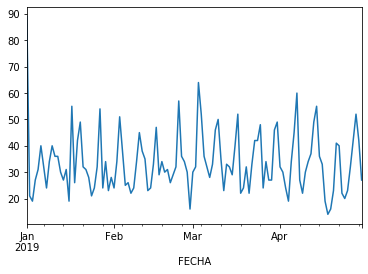

In [11]:
datos2019.plot()

In [12]:
descomposicion = sm.tsa.seasonal_decompose(datos2019, model="additive")


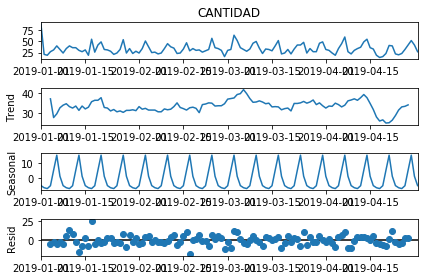

<Figure size 7.2e+07x720 with 0 Axes>

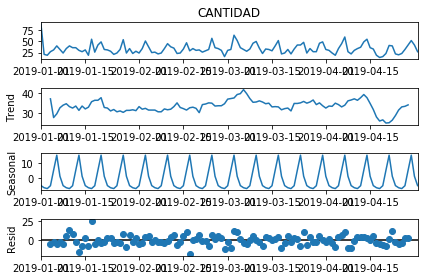

In [17]:
plt.figure(figsize=(1000000, 10))
descomposicion.plot()